In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def flip_a_coin(n=1):
    return np.random.choice(2, n)

In [4]:
flip_a_coin()

array([1])

In [5]:
def simulate_base_2_flip(n=2**16):
    heads = 0

    heads_check = []
    tails_check = []

    max_exp = math.log2(n)
    exp = 0
    count = 1
    
    while count < n:
        result = flip_a_coin()
        if result:
            heads += 1

        if count == 2**exp:
            heads_check.append(heads)
            tails_check.append(count - heads)
            exp += 1
            
        count +=1
    
    heads_check.append(heads)
    tails_check.append(count - heads)
    
    return heads_check, tails_check

In [6]:
heads, tails = simulate_base_2_flip()

In [7]:
distance_between = [a - b for a, b in zip(heads, tails)]

In [8]:
x1 = [2**n for n in range(17)]

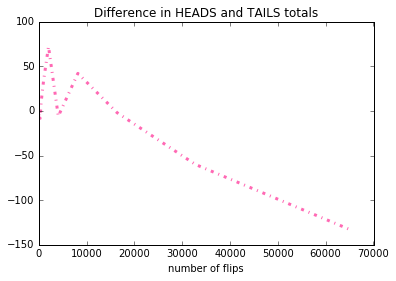

In [9]:
plt.plot(x1, distance_between, '-.', lw=3, c='hotpink')
plt.xlabel('number of flips')
plt.title('Difference in HEADS and TAILS totals')
plt.show()

In [10]:
def ratio(list_a):
    ratios = []
    for index, a in enumerate(list_a):
        b = (2**index) - a

        if b == 0:
            ratios.append(0)
        else:
            ratios.append(a / b)
    return ratios

ratio_h_to_t = ratio(heads)

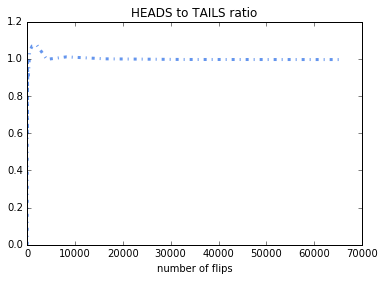

In [11]:
plt.plot(x1, ratio_h_to_t, '-.', lw=3, c='cornflowerblue')
plt.xlabel('number of flips')
plt.title('HEADS to TAILS ratio')
plt.show()

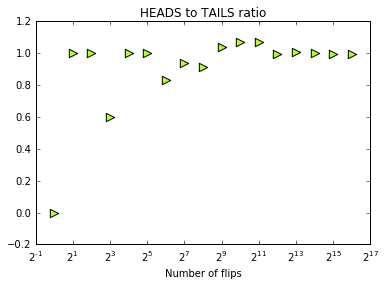

In [12]:
plt.scatter(x1, ratio_h_to_t, s=70, c='greenyellow', marker='>')
plt.title('HEADS to TAILS ratio')
plt.xlabel('Number of flips')
plt.xscale('log', basex=2)

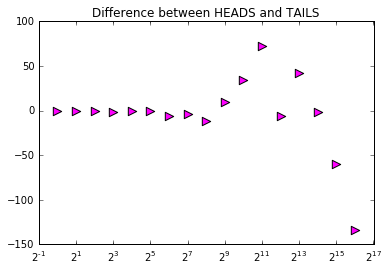

In [ ]:
plt.scatter(x1, distance_between, s=70, c='fuchsia', marker='>')
plt.title('Difference between HEADS and TAILS')
plt.xscale('log', basex=2)

### Logarithmic Axis Scale
A plot that as a logarithmic scale for the x-axis allows you to visualize the most important parts of data that changes exponentially. The base 2 arument allows you to see the data at the points it was collected.

#### Data Analysis
As the number of trials increases, the varaince in data grows, but the ratio levels out. I wanted to put in a nice markdown header, but I don't actually know how to analyze this data.

In [ ]:
ratios_by_point = {key: [] for key in x1}

for _ in range(20):
    heads, tails = simulate_base_2_flip()
    
    for i, value in enumerate(heads):
        ratios_by_point[x1[i]].append(heads[i])

for key in ratios_by_point:
    ratios_by_point[key] = ratio(ratios_by_point[key])

In [ ]:
means = []
for key in sorted(list(ratios_by_point.keys())):
    means.append(st.mean(ratios_by_point[key]))

st_devs = []
for key in sorted(list(ratios_by_point.keys())):
    st_devs.append(st.stdev(ratios_by_point[key]))

In [ ]:
plt.scatter(sorted(list(ratios_by_point.keys())), means, s=80, color='brown' , marker=(5, 1))
plt.xscale('log', basex=2)
plt.grid(True)
plt.show()

### Mean
This starry plot represents the ratio of heads:tails outcomes recoreded at each logartithmically increasing point.

##### Data Anaysis
The means of ratios get all wacky the more times you run the simluation. Not really sure what that tells us.

In [ ]:
plt.scatter(sorted(list(ratios_by_point.keys())), st_devs, s=80, color='orange' , marker=(5, 1))
plt.xscale('log', basex=2)
plt.grid(True)
plt.show()

### Standard Deviation
This starry plot shows the standard deviation of the heads:tails ratios at each recorded point. Logarithmic scale is helpful since the data was collected logarithmically.

#### Data Analysis
The standard deviation grows as the data set grows.

In [ ]:
def simulate_flips(n):
    heads = 0
    
    heads = sum(flip_a_coin(n))
    
    tails = n - heads
    return heads

In [ ]:
trial_a_ratios = []

for _ in range(100000):
    heads_flips = simulate_flips(100)
    trial_a_ratios.append(heads_flips / 100)

In [ ]:
n, bins, patches = plt.hist(trial_a_ratios)

mean = st.mean(trial_a_ratios)
stdev = st.stdev(trial_a_ratios)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='black', lw=4)

plt.yscale('log')
plt.title('Ratios of heads to flips per trial of 100')

cm = plt.cm.get_cmap('RdYlBu_r')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

In [ ]:
trial_b_ratios = []

for _ in range(100000):
    result = simulate_flips(1000)
    trial_b_ratios.append(result / 1000)

In [ ]:
n, bins, patches = plt.hist(trial_b_ratios)

mean = st.mean(trial_b_ratios)
stdev = st.stdev(trial_b_ratios)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='black', lw=4)

plt.yscale('log')
plt.title('Ratios of heads to flips per trial of 1000')

cm = plt.cm.get_cmap('RdYlBu_r')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

#### Data Analysis
The distribution (shape?) is the same as the last one, but the range of the data is smaller. The mean looks like almost exactly 50% in both.

pretty colors = STACK OVERFLOW FTW

In [ ]:
bp = plt.boxplot([trial_a_ratios, trial_b_ratios], labels=['100', '1000'])
plt.xlabel('# of flips per trial')
plt.title("Distribution of trial data")
plt.ylim([0.25, 0.75])
plt.setp(bp['whiskers'], color='red')
plt.show()

#### Data Analysis
Although both sets of data have roughly the same mean, the spread of the larger trial is much smaller. One could conclude that more trials leads to more accurate probabilities.